# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [160]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [161]:
med_charges = pd.read_csv('insurance2.csv')

In [162]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [163]:
np.random.seed(47)
N_rep = 10000

In [164]:
# Create bootstrap replicate function
# Where data is the sample
# and func is the statistical calculation function

def bootstrap_replicate(data, func):
    # generate bootstrap replicate of data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [166]:
# Create function to generate many boostrap replicates from data 

def draw_bootstrap_replicate(data, func, size=1):
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates
    

In [167]:
# Generate 10000 bootstrap replicates
# Generate bootstrap sample from med_charges dataframe for the charges column
# N_rep is the number of bootstrap replicates (10000)

# draw bootstrap replicates
bs_replicates = draw_bootstrap_replicate(med_charges['charges'], np.mean, N_rep)
print(bs_replicates)

[13386.79887534 13227.45279065 13445.33945215 ... 13471.93323532
 13362.85633056 13217.44777868]


In [168]:
# Calculate the 95% confidence interval lower limit

conf_int = np.percentile(bs_replicates, [5])
conf_int

array([12724.4679217])

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [169]:
# Calculate the 95% CI for the difference between the standard deviations of insured and non-insured claim charges 
# for 10000 replicates
# Plot the histogram of the values and mark percentiles
# State the null and alt hypothesis, retain or reject null? why? (if groups have equal variance or not)


In [170]:
# filter dataframe and assign people with insurance and no insurance to variables 
insured = med_charges[med_charges['insuranceclaim'] == 1]
insured

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


In [171]:
non_insured = med_charges[med_charges['insuranceclaim'] == 0]
non_insured

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,1,4239.89265,0
1328,23,0,24.225,2,0,0,22395.74424,0
1332,52,0,44.700,3,0,3,11411.68500,0
1333,50,1,30.970,3,0,1,10600.54830,0


In [172]:
# Generate 10000 bootstrap replicates of the standard deviation of insured and non-insured groups

# draw bootstrap replicates of insured and non-insured group
bs_replicates_insured = draw_bootstrap_replicate(insured['charges'], np.std, 10000)
print(bs_replicates_insured)

bs_replicates_non_insured = draw_bootstrap_replicate(non_insured['charges'], np.std, 10000)
print(bs_replicates_non_insured)

[14098.99462551 13975.28289395 13704.40437567 ... 13940.52229037
 14831.79662534 14185.77091509]
[6581.71933323 6385.7109862  6795.73964982 ... 6248.60376647 6541.01236047
 6933.37620321]


In [173]:
# Calculate the difference in the standard deviation between insured and non-insured groups
# pair-wise subtraction using list comprehension
# note: bs_replicates_insured and bs_replicates_non_insured both have 10000 items

difference_stddev = [(a - b) for a,b in zip(bs_replicates_insured, bs_replicates_non_insured)]
difference_stddev

[7517.275292273711,
 7589.571907755021,
 6908.664725850794,
 7674.13940818141,
 8525.823027465234,
 7062.37440397307,
 7327.228117961897,
 8893.156639434801,
 8211.130275122046,
 8311.867734823514,
 7422.062834625724,
 7616.253728347598,
 6831.534486825113,
 7831.132003071889,
 6986.98178643561,
 7981.328586599181,
 7849.0869907416745,
 7865.833805256407,
 7875.550046993353,
 8424.75503065138,
 7442.661579991739,
 7071.051125843052,
 7918.815392480487,
 7914.688030981601,
 7400.418873347796,
 7331.545468976071,
 7137.759773272664,
 7580.167244718562,
 8220.113022934755,
 7532.362339425938,
 7402.894259498973,
 8202.800682181292,
 7902.881823737781,
 7343.820914669729,
 7779.770553364465,
 6952.294295366586,
 8397.581861102935,
 7951.637941688041,
 8236.109348049937,
 7054.748777795895,
 6890.09333422037,
 7335.523841168364,
 7900.3326724508415,
 7697.131259463815,
 7835.741252627328,
 7636.67166672188,
 8244.175873146098,
 7657.1085813787,
 7784.927142037099,
 8205.994045993839,
 7417.

In [174]:
# Calculate the 95% confidence interval for the difference between the standard deviations of insurance and 
# non-insurance claim charges
# CI using 2.5 and 95.7 to calculate the 95% CI because this is a two sided test

confidence_interval_diff_stddev = np.percentile(difference_stddev, [2.5,97.5])
confidence_interval_diff_stddev

array([6670.01798997, 8504.74868331])

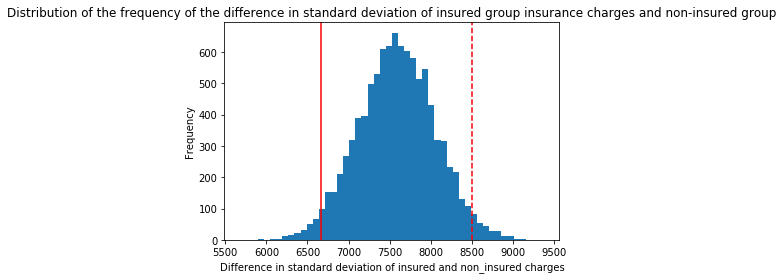

In [176]:
# Plot the histogram of values and mark the locations of the percentiles. 

_ = plt.hist(difference_stddev, bins=50)
_ = plt.xlabel('Difference in standard deviation of insured and non-insured charges')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of the frequency of the difference in standard deviation of insured group insurance charges and non-insured group')
_ = plt.axvline(confidence_interval_diff_stddev[0], color='r')
_ = plt.axvline(confidence_interval_diff_stddev[1], color='r', linestyle='--')


# State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

The null hypothesis is that the insured and non-insured group charges do not differ in variance.

The alternative hypothesis is that the insured and non-insured group charges do differ in variance.

In this case I would reject the null hypothesis because the 95% confidence interval does not include zero.

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [177]:
# To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the 
# null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme 
# as that actually observed.

# Perform a bootstrapped hypothesis test at the 5% significance level (𝛼 =0.05) 
# to calculate the p-value of the observed difference between insurance and non-insurance charges, 
# state your null and alternative hypotheses 
# and whether you retain or reject the null hypothesis for the given significance level.

In [178]:
# Generate shifted data sets for insurance and non-insurance charges

insured_shifted = insured['charges'] - np.mean(insured['charges'])
non_insured_shifted = non_insured['charges'] - np.mean(non_insured['charges'])

In [179]:
# Using my bootstrap replicates and many replicates functions from above 
# Generate 10000 bootstrap replicates of the shifted mean of insured and non-insured groups

# draw bootstrap replicates of insured and non-insured groups using np.mean as function
bs_replicates_insured_mean = draw_bootstrap_replicate(insured_shifted, np.mean, N_rep)
print(bs_replicates_insured_mean)

bs_replicates_non_insured_mean = draw_bootstrap_replicate(non_insured_shifted, np.mean, N_rep)
print(bs_replicates_non_insured_mean)

[-199.35357884 -194.58868282  258.35063743 ...   25.5606141   242.68869969
  237.12850595]
[  70.71783359   -9.11031175  239.0312982  ... -915.11843315  -71.70167519
  -92.49109973]


In [180]:
# Calculate the difference in the shifted means of replicates between insured and non-insured groups

difference_mean = [(a - b) for a,b in zip(bs_replicates_insured_mean, bs_replicates_non_insured_mean)]
difference_mean

[-270.07141242211105,
 -185.478371076006,
 19.31933923603026,
 408.05006802064224,
 -107.345743314624,
 -1188.5100898584433,
 -794.1446242670595,
 -158.2515971485961,
 11.44888676949455,
 1377.2752658524396,
 -309.17129914642123,
 -182.53564399050697,
 305.7041967128517,
 -31.654625961098205,
 -934.5574846262117,
 180.10126053605416,
 167.22141109599326,
 603.3495204140357,
 23.32030756891453,
 924.7258820752833,
 -995.5814109444956,
 398.200543498465,
 -939.9296126175823,
 -140.69593981005045,
 -106.48205760684735,
 290.32079897877264,
 -369.7421303053045,
 -452.97729187052494,
 60.001800873598626,
 924.7569127896871,
 405.3697328890624,
 89.80230620717359,
 556.5821170391779,
 538.1651976805433,
 -10.646404441751315,
 519.1665686110946,
 -628.2651973092393,
 -1631.6127407395318,
 75.44890219706014,
 89.53862873728986,
 37.299453834732105,
 -695.0048114029538,
 172.85352188816506,
 -23.889476228192734,
 -72.46545793665989,
 -273.23746845303833,
 674.8340119164346,
 868.035632452695,
 

In [181]:
# Calculate 5% confidence interval of difference in means of insured and non-insured group charges

confidence_interval_diff_mean = np.percentile(difference_mean, [5])
confidence_interval_diff_mean

array([-939.19845849])

In [182]:
# Compute the difference in mean of observed insured and non-insured charges

diff_means = np.mean(insured['charges'])-np.mean(non_insured['charges'])
diff_means


7602.506384231368

In [183]:
# Calculate p-value

p_value = np.sum(np.abs(difference_mean) > diff_means) / len(difference_mean)
p_value

0.0

# State null and alternative hypothesis and whether or not you retain or reject the null hypothesis given the significance level.

The null hypothesis is there is no difference in the means of insured and non-insured groups.

The alternative hypothesis is a difference in the means of insured and non-insured groups.

I would reject the null hypothesis because for the 5% significaance level the p-value is 0. 

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

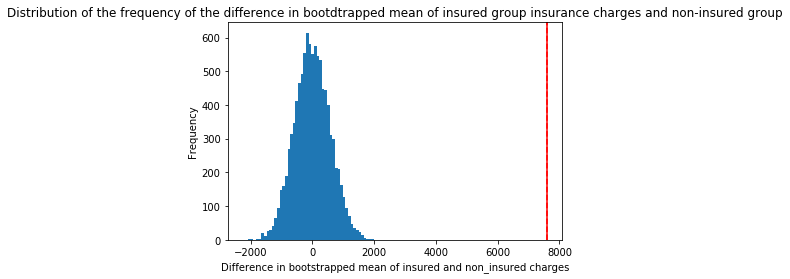

In [184]:
# Plot histogram of bootstrapped differences of mean

_ = plt.hist(difference_mean, bins=50)
_ = plt.xlabel('Difference in bootstrapped mean of insured and non_insured charges')
_ = plt.ylabel('Frequency') 
_ = plt.title('Distribution of the frequency of the difference in bootstrapped mean of insured group insurance charges and non-insured group charges')
_ = plt.axvline(diff_means, color='r')
_ = plt.axvline(diff_means, color='r', linestyle='--')



__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

Since I got a p value of 0 using bootstrapping I could try increasing the number of replicates I take to continue to move the upper bound on my p value lower.  

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ 

I would use the t-test function if using frequentist inference.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__

A two sided test would be appropriate in testing and simulating whether there is a difference between the click through rate from algorithm a versus b.

The null hypothesis would be that there is no difference between the click-through rate produced by algorithm a and b.

The alternative hypothesis would be that there is a difference between the click-through rate produced by algorithm a and b. 

A statistically significant result is not neccessarily a strong one, the real world consequence of rejecting the null hypothesis would be implementing a new strategy that is not as strong and important or as useful as perceived. 

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.